В этом уроке вы изучите статистические тесты, используемые для изучения вида распределения.

После изучения этого урока вы будете знать:

*  $\chi^2$-критерий Пирсона;
*  одновыборочный критерий Колмогорова-Смирнова;
*  критерий Шапиро-Уилка;
*  тест Андерсона-Дарлинга.

В этом уроке используйте файл используйте csv файл с данными, доступный по сылке

https://drive.google.com/file/d/1-oYHggLWmyxRNh6dc2YG9scLp4AQZFzr/view?usp=sharing

Датасет c информацией о моллюсках вида abalone, доступный на сайте Kaggle — онлайн-площадке соревнований по машинному обучению. Датасет содержит физические параметры моллюсков: рост, диаметр, высоту, вес раковины и т.д. Также присутствует один категориальный признак — пол моллюска. Ключевым атрибутом является количество колец у моллюска, определяющего его возраст.

# Постановка задачи

* Исследовать, распределен ли атрибут Length нормально, используя критерий $\chi^2$-критерий Присона;
*  Исследовать, распределен ли атрибут Rings нормально, используя критерий Шапиро-Уилка;
*  Исследовать, распределен ли атрибут Rings нормально, используя  одновыборочный критерий Колмагорова-Смирнова.


Критерий согласия Пирсона или критерий согласия $\chi ^{2}$ (хи-квадрат) — непараметрический метод, который позволяет оценить значимость различий между фактическим (выявленным в результате исследования) количеством исходов или качественных характеристик выборки, попадающих в каждую категорию, и теоретическим количеством, которое можно ожидать в изучаемых группах при справедливости нулевой гипотезы. Выражаясь проще, метод позволяет оценить статистическую значимость различий двух или нескольких относительных показателей (частот, долей).

Является наиболее часто употребляемым критерием для проверки гипотезы о принадлежности наблюдаемой выборки $x_{1},x_{2},...,x_{n}$ объёмом $n$ некоторому теоретическому закону распределения $F(x,\theta )$.

Критерий может использоваться при проверке простых гипотез вида

$H_{0}:F_{n}(x)=F(x,\theta ),$

где $\theta$ — известный вектор параметров теоретического закона, и при проверке сложных гипотез вида

$H_{0}:F_{n}(x)\in \left\{F(x,\theta ),\theta \in \Theta \right\},$

когда оценка $\hat {\theta }$ скалярного или векторного параметра распределения $F(x,\theta )$ вычисляется по той же самой выборке.

# Задача 1

Исследовать, распределен ли атрибут Length нормально, используя критерий  χ2 -критерий Пирсона.

### Шаг 1
Начать надо с загрузки и чтения файла.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html

In [ ]:
from google.colab import files
import pandas as pd
from scipy import stats
!ls
files.upload()
data = pd.read_csv('abalone.csv')
data.head()

sample_data


Saving abalone.csv to abalone.csv


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class_number_of_rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## Шаг 2
Найдем описательные статистики, построим гисторгамму и график "ящик с усами".

По полученным результатам можно сделать предположение, что число колец снижено в среднем равно почти 10

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.hist.html

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.hist.html

In [ ]:
data.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class_number_of_rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


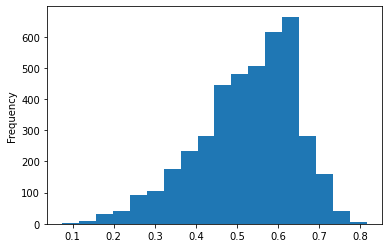

In [ ]:
histogram = data['Length'].plot.hist(bins=18)#how coarse is it

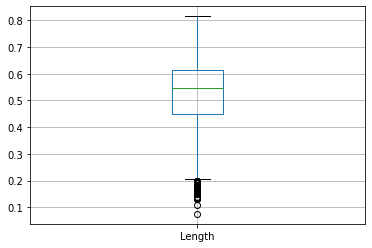

In [ ]:
boxplot = data.boxplot(column=['Length'])

###Шаг 3. Тесты на нормальность

Существует множество статистических тестов, используемых для статистической проверки того, была ли данная выборка извлечена из нормально распределенной генеральной совокупности или нет.

Каждый тест делает разные предположения и рассматривает разные аспекты данных. Мы рассмотрим три часто используемых теста.

Прежде чем применять статистические тесты, необходимо знать, как интерпретировать результаты. Каждый тест вернет как минимум две величины:

*  Статистика (statistic, float или array): величина, вычисляемая тестом, которую можно интерпретировать в контексте теста, сравнивая ее с критическими значениями из распределения статистики теста;
*  p-значение (pvalue, float или array): вероятность получить для данной вероятностной модели распределения значений случайной величины такое же или более экстремальное (чем посчитанная statistic) значение статистики, при условии, что нулевая гипотеза верна.

p-значение используется для интерпретации теста; в данном случае позволяет ответить на вопрос, была ли выборка взята из нормально распределенной генеральной совокупности.

In [ ]:
stat, p = stats.normaltest(data['Length']) # Критерий согласия Пирсона
print('Statistics=%.3f, p-value=%.5f' % (stat, p))

alpha = 0.05
if p >= alpha:
    print('Принять гипотезу о нормальности')
else:
    print('Отклонить гипотезу о нормальности')

Statistics=242.159, p-value=0.00000
Отклонить гипотезу о нормальности


Поскольку p-value меньше (много меньше!) уровня значимости  $\alpha=0.05$,  отвергаем нулевую гипотезу о нормальности как противоречащую эксприментальным данным. Считаем данные не нормально распределеными.

# Задача 2

Исследовать, распределен ли атрибут Rings нормально, используя критерий Шапиро-Уилка.

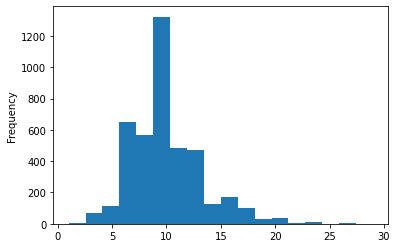

In [ ]:
histogram = data['Class_number_of_rings'].plot.hist(bins=18)#how coarse is it

Критерий Шапиро-Уилка

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html


Поскольку p-value меньше уровня значимости $\alpha = 0.05,$ отвергаем нулевую гипотезу о нормальности как противоречащую экспериментальным данным. Считаем данные не нормально распределенными.

In [ ]:
import scipy

stat, p = scipy.stats.shapiro(data['Class_number_of_rings']) # тест Шапиро-Уилк
#stat, p = scipy.stats.kstest(data['Class_number_of_rings'], stats.norm.cdf) #Kolmogorov-Smirnov test for goodness of fit
print('Statistics=%.3f, p-value=%.5f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности')
else:
    print('Отклонить гипотезу о нормальности')

Statistics=0.998, p-value=0.00000
Отклонить гипотезу о нормальности


# Задача 3

Исследовать, распределен ли атрибут Length нормально, используя критерий

Критерий Андерсона — Дарлинга

https://ru.wikipedia.org/wiki/%D0%9A%D1%80%D0%B8%D1%82%D0%B5%D1%80%D0%B8%D0%B9_%D0%90%D0%BD%D0%B4%D0%B5%D1%80%D1%81%D0%BE%D0%BD%D0%B0_%E2%80%94_%D0%94%D0%B0%D1%80%D0%BB%D0%B8%D0%BD%D0%B3%D0%B0

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html

Поскольку p-value больше уровня значимости  α=0.05,  отвергаем нулевую гипотезу о нормальности как противоречащую эксприментальным данным. Считаем данные не нормально распределеными.

In [ ]:
from scipy.stats import anderson
result = anderson(data['Length'], dist='norm')
result

AndersonResult(statistic=36.6212136651302, critical_values=array([0.575, 0.655, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=0.5239920995930094, scale=0.12009291256479956)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')